In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

(30038883.33518404, 0.9437254034378086)

In [ ]:
df = pd.read_csv('clean_data.csv')

# Convert 'Date' to datetime and extract year, month, and day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)  # Drop the original 'Date' column

# Encode categorical variables
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

In [ ]:
# Dropping duplicate columns
df.drop(['year', 'month', 'week'], axis=1, inplace=True)

# Feature Selection

In [ ]:
# Creating interaction terms
df['Store_Dept'] = df['Store'].astype(str) + '_' + df['Dept'].astype(str)
df['Type_Size'] = df['Type'].astype(str) + '_' + df['Size'].astype(str)

# Creating rolling averages and lag features
df.sort_values(by=['Store', 'Dept', 'Year', 'Month', 'Day'], inplace=True)

# Rolling averages for 4 weeks and 12 weeks
df['Rolling_Mean_4'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=4).mean())
df['Rolling_Mean_12'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=12).mean())

# Lag features for the previous week
df['Lag_1'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)

# Drop the first 12 rows for each group since they won't have complete rolling features
df = df.groupby(['Store', 'Dept']).apply(lambda x: x.iloc[12:]).reset_index(drop=True)

# Handling missing values in new columns
df.fillna(method='ffill', inplace=True)

# Encoding new categorical features
label_encoder = LabelEncoder()
df['Store_Dept'] = label_encoder.fit_transform(df['Store_Dept'])
df['Type_Size'] = label_encoder.fit_transform(df['Type_Size'])

In [ ]:
# Redefining FEATURES after adding new features
FEATURES = [i for i in df.columns if i != 'Weekly_Sales']

# Splitting the data

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df[FEATURES], df['Weekly_Sales'], test_size=0.2, random_state=130)

In [ ]:
# Training the improved Linear Regression Model
reg_improved = LinearRegression()
reg_improved.fit(X_train, y_train)


In [ ]:
# Predictions
predictions_improved = reg_improved.predict(X_test)

In [ ]:
# Calculate the new mean squared error and R^2 Score
mse_improved = mean_squared_error(y_test, predictions_improved)
r2_improved = r2_score(y_test, predictions_improved)

mse_improved, r2_improved

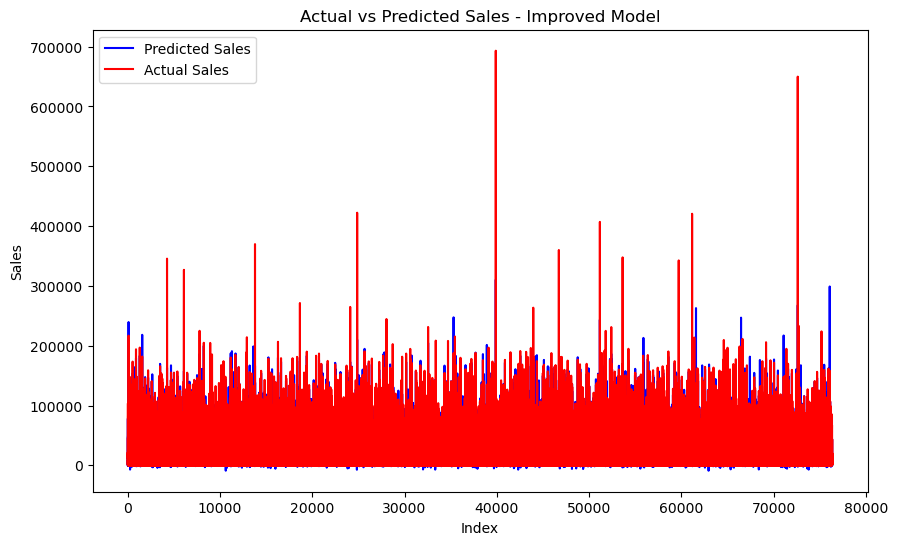

In [2]:
# Visualization using seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(predictions_improved)), y=predictions_improved, color="blue", label="Predicted Sales")
sns.lineplot(x=np.arange(len(y_test)), y=y_test.values, color="red", label="Actual Sales")
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales - Improved Model')
plt.legend()
plt.show()


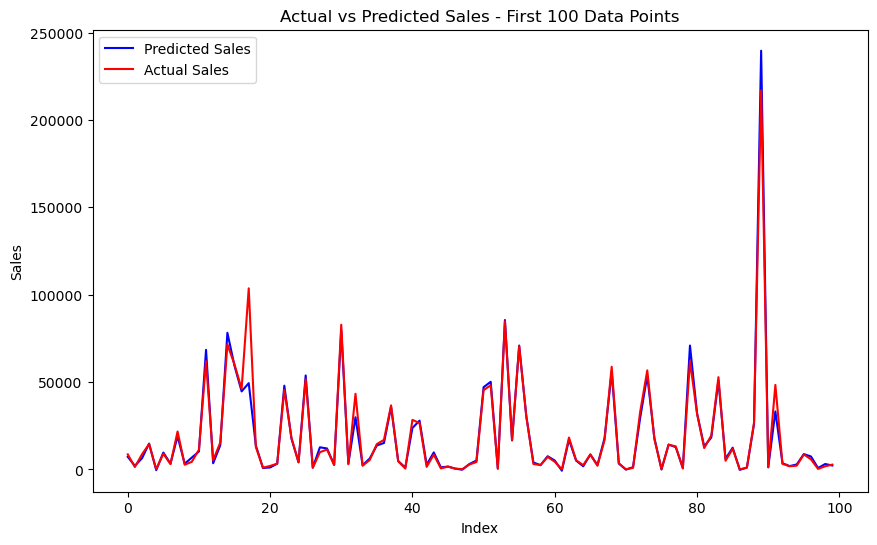

In [3]:
# Limiting the data to the first 100 points
limited_range = 100
predictions_subset = predictions_improved[:limited_range]
y_test_subset = y_test.values[:limited_range]

# Visualization using seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(limited_range), y=predictions_subset, color="blue", label="Predicted Sales")
sns.lineplot(x=np.arange(limited_range), y=y_test_subset, color="red", label="Actual Sales")
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales - First 100 Data Points')
plt.legend()
plt.show()


In [4]:
# Printing the model's accuracy metrics
print(f"Mean Squared Error: {mse_improved:.2f}")
print(f"R-squared Score: {r2_improved:.4f}")


Mean Squared Error: 30038883.34
R-squared Score: 0.9437


In [6]:
sales_comparison = pd.DataFrame({
    'Actual Sales': y_test[:10].values,  
    'Predicted Sales': predictions_subset[:10]  
})

# Display the DataFrame
print(sales_comparison)

   Actual Sales  Predicted Sales
0       8617.40      7226.651457
1       1387.45      2070.583462
2       8670.00      6403.294610
3      14511.07     14804.432945
4        204.86      -405.247781
5       9035.57      9684.973325
6       3063.83      3307.298936
7      21737.09     19019.157186
8       2696.82      3273.082979
9       4372.01      6798.837966


In [8]:
r2 = 0.9437  

# Converting R-squared score to a percentage
r2_percentage = r2 * 100

# Printing the accuracy as a percentage
print("Accuracy: {:.2f}%".format(r2_percentage))


Accuracy: 94.37%
